#**Churn Prediction EDA**

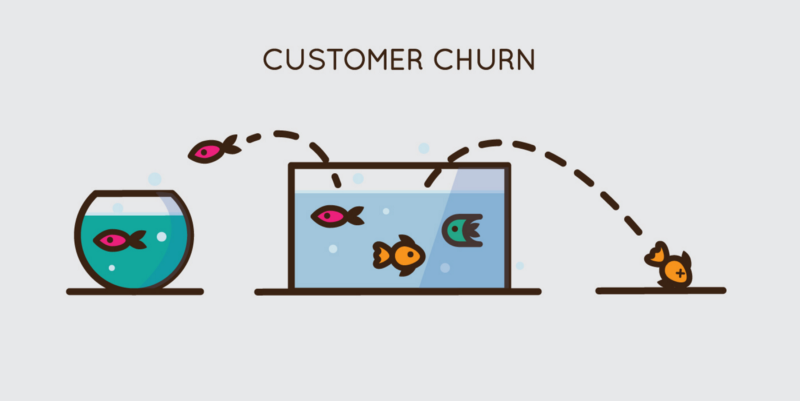



Nesse artigo vamos explorar o dataset de uma empresa de telecomunicações. Realizaremos uma análise exploratória para descobrirmos quais as principais características de um futuro cliente Churn.





#Mas o que são Churn?!

 

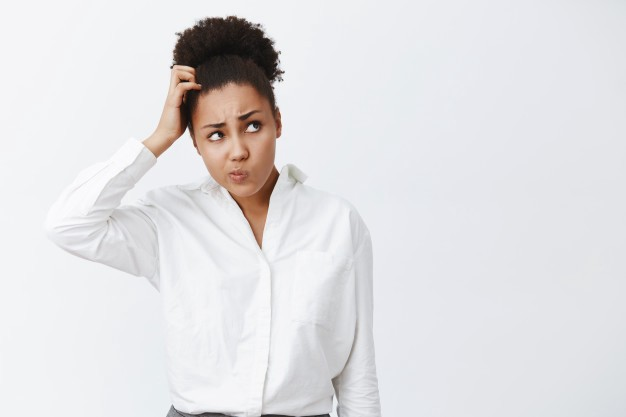

Em si o Churn é o número total de clientes que, em um certo peródo de tempo, não querem mais comprar o produto de determinada empresa ou que não desejam mais utilizar do serviço prestado pela companhia. Essa rotatividade de clientes é algo constante e natural de qualquer negócio ([Salesforce](https://www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn/), [Resultados digitais](https://resultadosdigitais.com.br/blog/o-que-e-churn/)).




Indicador Churn Rate: taxa de rotatividade de clientes

Toda empresa planeja e faz o máximo para ter o menor o Churn Rate possível e assim obter uma maior retenção de clientes. Já um Churn Rate alto indica que um maior número de clientes que cancelaram suas assinaturas([Salesforce](https://www.salesforce.com/resources/articles/how-calculate-customer-churn-and-revenue-churn/)). 

Essas métricas são fundamentais para a sobrevivência de qualquer empreendimento nos dias atuais. De acordo com Philip Kotler, o pai da marketing, conquistar um novo cliente pode custar de 5 à 7 vezes mais do que manter os já existentes ([GONÇALVES .H, 2007](https://lume.ufrgs.br/bitstream/handle/10183/14026/000649603.pdf); [Suno research](https://www.suno.com.br/tudo-sobre/philip-kotler/#:~:text=Philip%20Kotler%20%C3%A9%20um%20estudioso,principalmente%20no%20campo%20do%20marketing.&text=Philip%20Kotler%20ainda%20tem%20boa,de%20%E2%80%9CPai%20do%20Marketing%E2%80%9C.)).

Portanto, se uma empresa quer garantir a permanência de seus consumidores, uma análise exploratória de dados ajudaria muito a identificar futuros clientes que não utilizaram mais seus serviços. Além disso, um modelo eficaz de machine learning poderia trazer resultados ainda melhores.


## **Objetivo**

O objetivo deste artigo é realizar uma análise exploratória de um conjunto de dados [IBM](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/) de uma empresa anonima de telecomunicações.

No próximo projeto estará toda a análise de previsão de um modelo de machine learning para pever os futuros clientes que pensam em desistir de suas assinaturas.

## **1. Importando bibliotecas e Importando dados**

In [1]:
#importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties

In [2]:
#importando dados
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## **2. Análise exploratória**

A partir deste capítulo vamos identificar problemas em relação aos dados ausentes, outliers e entender melhor o problema que estamos envolvidos. 

### **2.1 Entendendo melhor o conjunto de dados**

In [3]:
#verificando tamanho do conjunto de dados
print('quantidade de linhas/entradas =', df.shape[0])
print('quantidade de colunas/variáveis =', df.shape[1])

quantidade de linhas/entradas = 7043
quantidade de colunas/variáveis = 21


Abaixo encontra-se as 5 primeiros linhas do dataset, assim conseguimos ter uma melhor visualização dos dados que estamos trabalhando.

In [ ]:
#5 primeiras linhas do conjunto de dados
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


_Em um dataset cada coluna é uma variável do problema estudado._

É importante descrevemos bem o que é cada uma dessas variáveis, pois iremos tirar nossos insigths e hipóteses a partir dos seus resultados, abaixo pode-se ver o significado de cada uma das...

**Colunas/variáveis do conjunto de dados**

* **customerID**: ID do cliente(identificação)
---
* **gender**: sexo da pessoa( Male:homem Female:mulher)
---
* **SeniorCitizen**: pessoas da terceira idade (idosas>60 anos) normalmente aposentadas *(0 - não ou 1 - sim)*
---
* **Partner**: pessoas que tem um companheiro ou companheira, que vivem juntos ou são casados
---
* **Dependents**: se é dependente de alguma pessoa, não tem renda fixa 
---
* **tenure**: a quanto meses a pessoa assinou o plano
---
* **PhoneService**: utiliza o plano de telefone *(sim ou não)*
---
* **MultipleLines**: utiliza o plano de telefone com multiplas linhas ('No phone service', 'No', 'Yes')
---
* **InternetService**: utiliza o serviço de internet e o tipo ('DSL', 'Fiber optic', 'No')
---
* **OnlineSecurity**: utiliza o serviço de segurança/antivirus online *(sim ou não)*
---
* **OnlineBackup**: serviço de backup *(sim ou não)*
---
* **DeviceProtection**: dispositivo de proteção da rede contra tempestades *(sim ou não)*
---
* **TechSupport**: assina suporte técnico *(sim ou não)*
---
* **StreamingTV**: utiliza plano de TV paga *(sim ou não)*
---
* **StreamingMovies**: utiliza plano de TV paga com foco em filmes *(sim ou não)*
---
* **Contract**: tempo de contrato *('Month-to-month', 'One year', 'Two year')
---
* **PaperlessBilling**: recebe boleto online *(sim ou não)*
---
* **PaymentMethod**: método de pagamento *('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)')*
---
* **MonthlyCharges**:  valor do pacote no mês específico (valor monetário)
---
* **TotalCharges**: valor total pago desde o início até o dia atual do conjunto ou até o fim da assinatura (valor monetário)
---
* **Churn**: *(sim: cliente cancelou o plano, não: cliente não cancelou)*


Abaixo pode-se observar os tipo de cada variável e vemos que a maioria são do tipo *object*. Geralmente esse tipo de variável são strings que representam variáveis categóricas.

Na parte de *machine learning* realizaremos a mudança dessas variáveis para um tipo int. Os modelos de *machine learning* apenas aceitam variáveis numéricas, mas ainda representaram as variáveis de forma categórica.

In [ ]:
#tipo de cada variável
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
#mudando a variável TotalCharges para tipo float
df['TotalCharges'] = pd.to_numeric(arg = df['TotalCharges'], errors='coerce')

Vamos verificar a quantidade de dados ausentes?!?

Nota-se que apenas a variável _TotalCharges_ tem dados ausentes, sendo 11 entradas.

In [5]:
#verificando dados ausentes
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Vamos analisar os motivos desses dados ausentes!!!

In [ ]:
#3 linhas que apresentam dados ausentes em TotalCharges
df[df['TotalCharges'].isnull()].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No


Nas três linhas pode-se observar algo curioso, a variável tenure é representada como zero, isso indica que esses clientes ainda não têm nenhum mês de assinatura.

Portanto, os valores corretos em TotalCharges para essas linhas são zero e não ausentes. Substituindo os dados ausentes por zero, o conjunto não terá elementos faltantes.

In [ ]:
#alterando os valores de TotalCharges
df.fillna(value={'TotalCharges':0}, inplace=True)

print("quantidade de dados ausentes em TotalCharges {}".format(df['TotalCharges'].isnull().sum()))

quantidade de dados ausentes em TotalCharges 0


Pronto não há mais nenhum dado ausente.

### **2.2 Obtendo alguns insights do conjunto de dados**

Daqui em diante iremos se aprofundar melhor na nossa avaliação para obter insights importantes para entermos o problema e ver possíveis soluções.

Queremos obter respostas de algumas perguntas importantes:

* **2.2.1** Qual é a quantidade de clientes que cancelaram seus planos e também as que ainda mantém suas assinaturas?!?

  * **2.2.2.1** Qual é o valor monetário mensal em assinaturas que foi perdido com evasão?!?

* **2.2.2** Quanto tempo a empresa tem para conquistar a admiração de um novo consumidor e mante-lo como um cliente fiél?!?

* **2.2.3** A quanto tempo a maioria dos clientes fiéis a empresa tem seus contratos?!?

* **2.2.4** Qual é a distribuição dos valores mensais de assinatura?!?

* **2.2.5**  Quem utiliza serviço de proteção tem uma maior probabilidade de não desistir de suas assinaturas?!?

* **2.2.6** O conjunto de dados tem outliers?!?


#### **2.2.1 Qual é a quantidade de clientes que cancelaram seus planos e também as que ainda mantém suas assinaturas?!?**

***Essa análise é importante por dois motivos!!!***

* 1ª: a coluna Churn é nossa variável dependente (alvo), sendo fundamental existir um balanceamento nas duas classes de dados(50% yes, 50% no);

* 2ª: a partir desse gráfico teremos a primeira ideia de como está a situação da empresa de telecomunicações, se ela tem uma boa retenção de clientes ou uma alta evasão.



> `Para representar essa análise um gráfico barras da coluna Churn cairia muito bem!!!.`


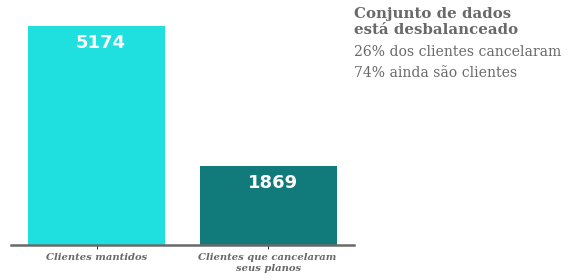

In [6]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(15)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(14)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_style('italic')
font2.set_weight('bold')
font2.set_size(10)

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize = (8,4))

#plotando gráfico
sns.countplot(x=df['Churn'], ax=ax, palette = ['#00FFFF', '#008B8B'])

#removendo ticks do eixo y
ax.tick_params(axis = 'y', labelleft=False, width=False)

#removendo label
ax.set_ylabel('')
ax.set_xlabel('')

#mudando ticks x
ax.set_xticklabels(['Clientes mantidos', 'Clientes que cancelaram \nseus planos'], fontproperties = font2, color = '#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#removendo linha direita, esquerda, superior 
for axis in ['top', 'right', 'left']:
  ax.spines[axis].set_color(None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#colocando legenda das quantidades dentro do gráfico
leg_1 = df['Churn'].value_counts().values
for i in range(0,len(leg_1), 1):
  ax.text(x = i-0.12, y = leg_1[i]-500, s = str(leg_1[i]), fontsize = 18, color = '#FFFAFA',  weight='bold')

#criando texto para o gráfico
plt.text(x=1.5,y=5000,s='Conjunto de dados \nestá desbalanceado', fontsize=15, weight='bold', color='#696969', fontproperties=font)
plt.text(x=1.5, y=4500, s = '26% dos clientes cancelaram',fontsize=14, color='#696969', fontproperties = font1)
plt.text(x=1.5, y=4000, s = '74% ainda são clientes ',fontsize=14, color='#696969', fontproperties = font1)

#otimizando tamanho
fig.tight_layout();

Nota-se que a variável Churn está desbalanceada, sendo prejudicial para um futuro modelo de machine learning, uma vez que a falta de proporção nas observações da variável alvo, fará com que o modelo não consiga aprender a prever a classe minoritária de dados.

obs: balanceamento será realizado no segundo o artigo no tópico de Machine Learning.

Já a situação da empresa em relação ao seus clientes, mostra um desempenho não tão positivo, pois 26% dos clientes nos últimos 6 anos cancelaram suas assinaturas.

> `No entanto, para termos uma melhor visão do impacto desses 1868 clientes, vamos ver quanto eles valiam financeiramente para empresa?!?`



A figura abaixo representa os valores mensais em assinaturas ganhos e perdidos ao longo dos 6 anos da empresa.

#### **2.2.1.1 Qual é o valor monetário mensal em assinaturas que foi perdido com evasão?!?**

In [7]:
#criando variáveis para o realizamento do gráfico
val = []
eixo_x_graf_2 = ['Total mensal em assinaturas \nperdidas em 6 anos', 'Total mensal conquistado \nno último mês']
val.append(df[df['Churn']=='Yes']['MonthlyCharges'].sum())
val.append(df[df['Churn']=='No']['MonthlyCharges'].sum())

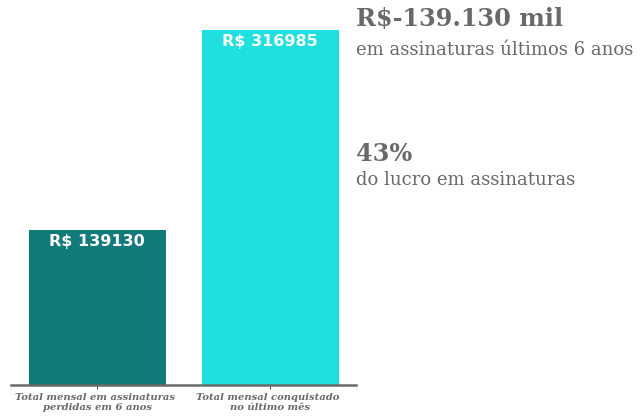

In [8]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(24)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(18)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_style('italic')
font2.set_weight('bold')
font2.set_size(10)

#estilo do gráfico
sns.set_style('ticks')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(9,6))

#plotando gráfico
sns.barplot(x=eixo_x_graf_2, y=val, ax=ax, palette = ['#008B8B', '#00FFFF'])

#removendo ticks do eixo y
ax.tick_params(axis='y', labelleft=False, color='white')

#removendo linha direita, esquerda, superior
for axis in ['top', 'right', 'left']:
  ax.spines[axis].set_color(None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#mudando ticks x
ax.set_xticklabels(labels = eixo_x_graf_2, fontproperties=font2, color='#696969')

#colocando legenda das quantidades dentro do gráfico
for i in range(0, len(val), 1):
  ax.text(x = i-0.28, y = int(val[i])-15000, s = 'R$ ' + str(int(val[i])), fontsize = 16, color = '#FFFAFA',  weight='bold')

#criando texto para o gráfico
ax.text(x = 1.5, y = 295000, s = 'R$-139.130 mil \n', fontsize = 24, weight = 'bold', color='#696969', fontproperties=font)
ax.text(x = 1.5, y = 294000, s = 'em assinaturas últimos 6 anos', fontsize = 18, color='#696969', fontproperties=font1)
ax.text(x = 1.5, y = 200000, s = '43%', fontsize = 40, color='#696969', weight = 'bold', fontproperties=font)
ax.text(x = 1.5, y = 160000, s = 'do lucro em assinaturas\n', fontsize = 18, color='#696969', fontproperties=font1)

#otimizando tamanho
fig.tight_layout();



> `Financeiramente a empresa teve um alto prejuízo. Uma perda ao longo dos 6 anos que equivale 43% do lucro mensal atual. Olhando para esse aspecto percentual, é um valor considerávelmente alto para companhia.`



Além de não estarmos considerando todo o valor perdido, que foi investido em marketing, vendas, TI etc para conquistar esses clientes que depois de um período de tempo cancelam seus planos.

Através destes dois gráficos fica óbvio o grande prejuízo que a falta de uma melhor política de retenção de clientes está causando nessa organização.



Além disso, algo muito importante para checarmos é:

#### **2.2.2 Quanto tempo a empresa tem para conquistar a admiração de um novo consumidor e mante-lo como um cliente fiél?!?**

In [9]:
#criando variáveis para o realizamento do gráfico
val_1 = []
leg_1 = []
val_2 = []
for i in range(1,73,1):
  val_1.append( df[(df['Churn']=='Yes') & (df['tenure']==i)]['MonthlyCharges'].sum() )
  val_2.append( df[(df['Churn']=='No') & (df['tenure']==i)]['MonthlyCharges'].sum() )
  leg_1.append(i)

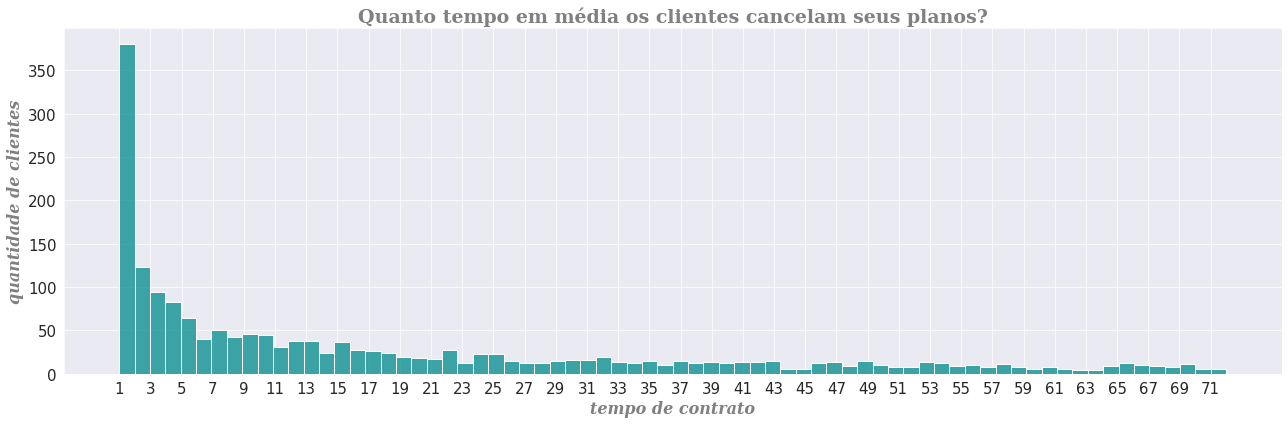

In [10]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size('19')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(16)

#estilo do gráfico
sns.set_style('darkgrid')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(18,6))

#plotando gráfico
sns.histplot(x=df[df['Churn'] == 'Yes']['tenure'], ax=ax, bins=72, color='#008B8B')

#atribuindo um título ao gráfico
ax.set_title('Quanto tempo em média os clientes cancelam seus planos?', fontproperties = font, color='#808080')

#mudando ticks x 
ax.set_xticklabels(labels=np.arange(1,72,2), fontdict={'fontsize':15})
ax.set_xticks(np.arange(1,72,2))

#mudando ticks y
ax.set_yticklabels(labels=np.arange(0,400,50), fontdict={'fontsize':15})
ax.set_yticks(np.arange(0,400,50))

#mudando nome do eixo x e y
ax.set_xlabel('tempo de contrato', fontproperties=font1, color='#808080')
ax.set_ylabel('quantidade de clientes', fontproperties=font1, color='#808080')

#removendo linha direita, esquerda, superior
for axis in ['top', 'right', 'bottom', 'left']:
  ax.spines[axis].set_color(None)

#otimizando tamanho
fig.tight_layout();

Podemos observar que:
* A maioria dos clientes desistem de sua assinatura após o primeiro mês;

* Até 5 meses há uma desistência de mais de 50 clientes;

* Nota-se que uma desistência a qualquer período de uso, pois mostra cancelamentos de até 72 meses.

> `Esse resultado mostra o grande desafio que esta empresa de telecomunicações aguarda pela frente. A companhia tem poucos meses até identificar um cliente Churn e aplicar alguma metodologia e benefícios para reter esse consumidor.`

Porém, é evidente que investir dinheiro para manter esse novo usuário é muito menos custoso do que perdê-lo e investir na busca de um novo. Ou melhor, porque não garatir esse cliente e posteriormente investir o lucro deste na conquista de um novo cliente ao mesmo tempo.

Vamos dar uma olhada em coisas boas também!!!

#### **2.2.3 A quanto tempo a maioria dos clientes fiéis a empresa tem seus contratos?!?**

Realizaremos um gráfico de distribuição comparando clientes fiés a empresa e cliente que cancelaram suas assinaturas.

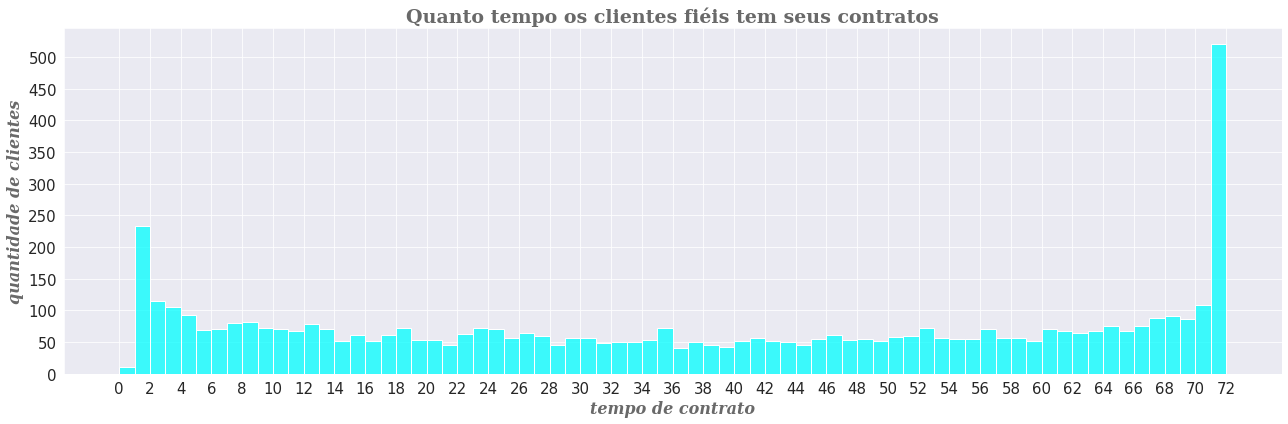

In [11]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size('19')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(16)

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(18,6))

#plotando gráfico
sns.histplot(x=df[df['Churn'] == 'No']['tenure'], ax=ax, bins=72, color='#00FFFF')

#atribuindo um título ao gráfico
ax.set_title('Quanto tempo os clientes fiéis tem seus contratos', fontproperties = font, color='#696969')

#mudando ticks x 
ax.set_xticklabels(labels=np.arange(0,73,2), fontdict={'fontsize':15})
ax.set_xticks(np.arange(0,73,2))

#mudando ticks y
ax.set_yticklabels(labels=np.arange(0,550,50), fontdict={'fontsize':15})
ax.set_yticks(np.arange(0,550,50))

#mudando nome do eixo x e y
ax.set_xlabel('tempo de contrato', fontproperties=font1, color='#696969')
ax.set_ylabel('quantidade de clientes', fontproperties=font1, color='#696969')

#otimizando tamanho
fig.tight_layout();

Já nesse histograma nota-se que:

* Mais de 500 clientes já estão com seus a planos há 6 anos, mostrando que exitem clientes que admiram e gostam dos benefícios dos serviço da empresa.
* Nos últimos 4 meses teve uma crescente ascensão de clientes novos.

#### **2.2.4 Qual é a distribuição dos valores mensais de assinatura?!?** 

Realizaremos um gráfico de distribuição comparando clientes fiés a empresa e cliente que cancelaram suas assinaturas.

In [12]:
#criando função para fazer ticks
def escala(minimo, maximo, intervalo):
  x = []
  for i in range(minimo, maximo, intervalo):
    x.append(i)
  return x

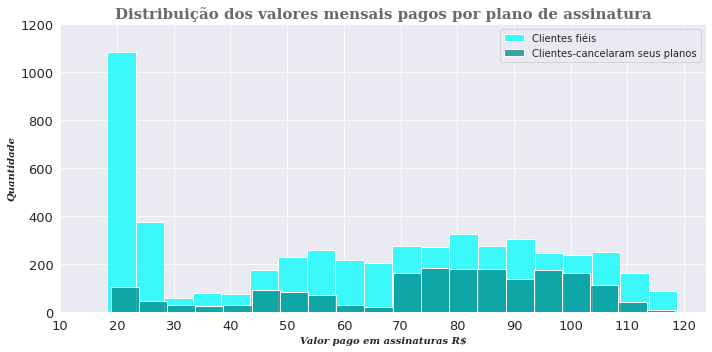

In [13]:
#definindo fontes
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_weight('bold')
font.set_size(15)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_style('italic')
font1.set_weight('bold')
font1.set_size(10)

#definindo estilo
sns.set_style('darkgrid')

#criando figure, axes e definindo tamanho do gráfico
fig, ax = plt.subplots(figsize=(10,5))

#plotando gráfico
sns.histplot(df[df['Churn']=='No']['MonthlyCharges'], ax=ax, kde = False, color = '#00FFFF', bins = 20)
sns.histplot(df[df['Churn']=='Yes']['MonthlyCharges'], ax=ax, kde = False, color = '#008B8B', bins = 20)

#atribuindo um título ao gráfico
ax.set_title('Distribuição dos valores mensais pagos por plano de assinatura', fontproperties = font, color = '#696969')

#mudando nome do eixo x e y
ax.set_xlabel('Valor pago em assinaturas R$', fontproperties = font1)
ax.set_ylabel('Quantidade', fontproperties = font1)

#atribuindo legenda
ax.legend(['Clientes fiéis','Clientes-cancelaram seus planos'])

#mudando ticks x
ax.set_xticklabels(labels = np.arange(10,140,10),fontdict={'fontsize':13})
ax.set_xticks(np.arange(10,130,10))

#mudando ticks y
ax.set_yticklabels(labels = np.arange(0,1400,200),fontdict={'fontsize':13})
ax.set_yticks(np.arange(0,1400,200))

#otimizando tamanho
fig.tight_layout();

Observa-se uma tendência semelhante dos dois tipos de clientes. Porém, em uma escala de menor quantidade para os clientes que desistiram da empresa.

* Churn: a maior frequência de assinaturas dos planos são de valores de R$ 70 até 100.

* clientes fiéis: Aproximadamente 1100 clientes assinam um pacote do valor entre RS 20 e 25. Além disso percebe-se uma alta frequência nos valores de RS 50 até 110.

Algo curioso para testarmos com esses dados, é se o cliente que utiliza de algum pacote de proteção como DeviceProtection, OnlineSecurity, OnlineBackup, TechSupport possuem uma menor chance de cancelarem seus planos.


#### **2.2.5  Quem utiliza serviço de proteção tem uma maior probabilidade de não desistir de suas assinaturas?!?**

Para responder essa pergunta, realizaremos 8 gráficos de barras.

Os 4 primeiros gráficos abaixo, são referentes aos clientes que não utilizam destes serviços.

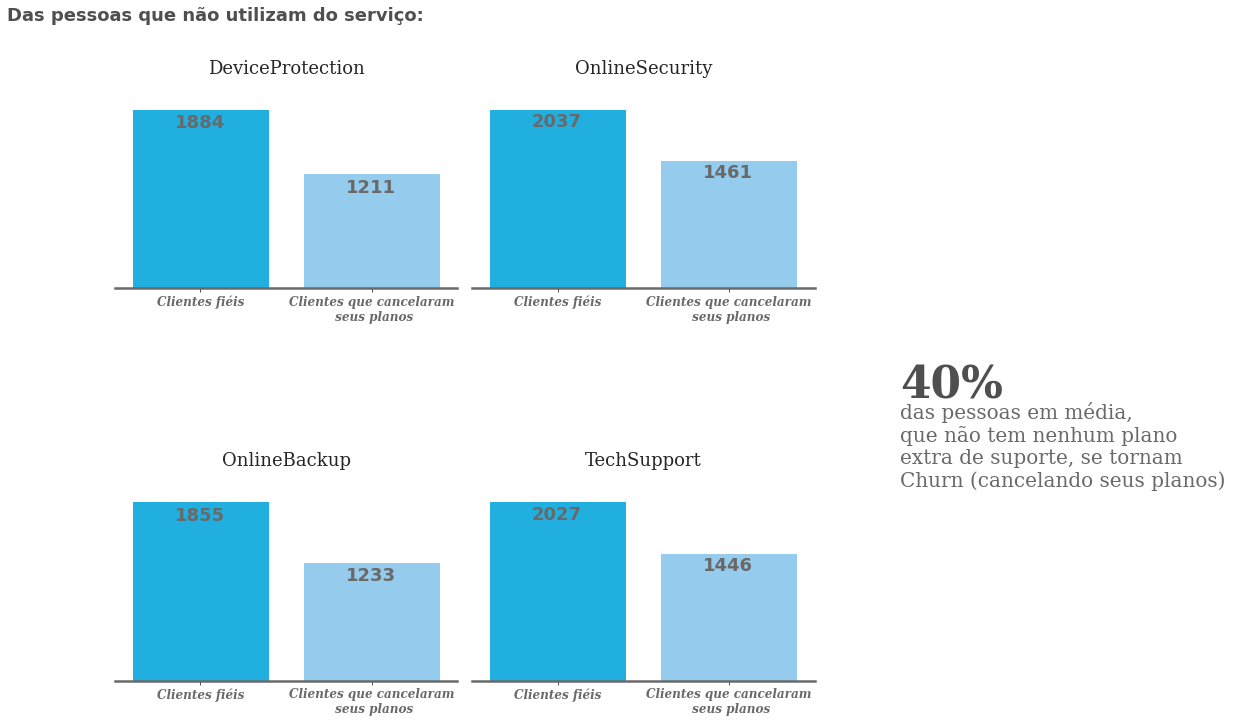

In [14]:
#definindo fontes

font4 = FontProperties()
font4.set_family('serif')
font4.set_name('serif')
font4.set_style('italic')
font4.set_weight('bold')
font4.set_size(12)


font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(20)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_size(18)

font3 = FontProperties()
font3.set_family('serif')
font3.set_name('serif')
font3.set_weight('bold')
font3.set_size(44)


sns.set_style('ticks')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))


#plotando gráfico
sns.countplot(x=df[df['DeviceProtection']=='No']['Churn'], ax=ax[0][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineSecurity']=='No']['Churn'], ax=ax[0][1], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineBackup']=='No']['Churn'], ax=ax[1][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['TechSupport']=='No']['Churn'], ax=ax[1][1], palette = ['#00BFFF', '#87CEFA'])

plt.suptitle("Das pessoas que não utilizam do serviço:", x=0.1, y=1, fontsize=18, weight='bold', color='#4F4F4F')

#removendo linha direita, esquerda, superior 
for axis in ['top', 'left', 'right']:
  for i in range(0,2,1):
    for j in range(0,2,1):
       ax[i][j].spines[axis].set_color(None)

#aumentando espessura da linha inferior 
for i in range(0,2,1):
  for j in range(0,2,1):
    ax[i][j].spines['bottom'].set_linewidth(2.5)
    
    ax[i][j].spines['bottom'].set_color('#696969')

    #removendo ticks do eixo y
    ax[i][j].tick_params(axis = 'y', labelleft = False, width=False)

    #removendo label
    ax[i][j].set_ylabel('')
    ax[i][j].set_xlabel('')

    ax[i][j].set_xticklabels(['Clientes fiéis','Clientes que cancelaram\n seus planos'], fontproperties=font4, color = '#696969')


#colocando legenda das quantidades dentro do gráfico
l=-1
leg_2 = ['DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'TechSupport']
for i in range(0,2,1):
  for j in range(0,2,1):
    l=l+1
    for k in range(0,2,1):
      ax[i][j].text(x = k-0.15, y = df[df[str(leg_2[l])]=='No']['Churn'].value_counts().values[k]-200,  
                    s = str(df[df[str(leg_2[l])]=='No']['Churn'].value_counts().values[k]), size=18, weight='bold', color='#696969') 


#criando texto para o gráfico 
plt.text(x=2,y=2200, s='das pessoas em média, \nque não tem nenhum plano \nextra de suporte, se tornam\nChurn (cancelando seus planos)',
         color='#696969', fontproperties=font1)
plt.text(x=2,y=3200, s='40%', fontsize=30, weight='bold', color='#4F4F4F',  fontproperties=font3)

#adicionando texto
ax[0][0].set_title("\n\nDeviceProtection\n", fontproperties=font2)
ax[0][1].set_title("OnlineSecurity\n",fontproperties=font2)
ax[1][0].set_title("OnlineBackup\n", fontproperties=font2)
ax[1][1].set_title("TechSupport\n", fontproperties=font2)


#otimizando tamanho
fig.tight_layout();

Assim fazendo uma média do percentual dos clientes que cancelaram seus planos chegamos ao valor de 40%.

Os 4 próximos gráficos são em relação aos clientes que utilizam algum serviço de segurança.

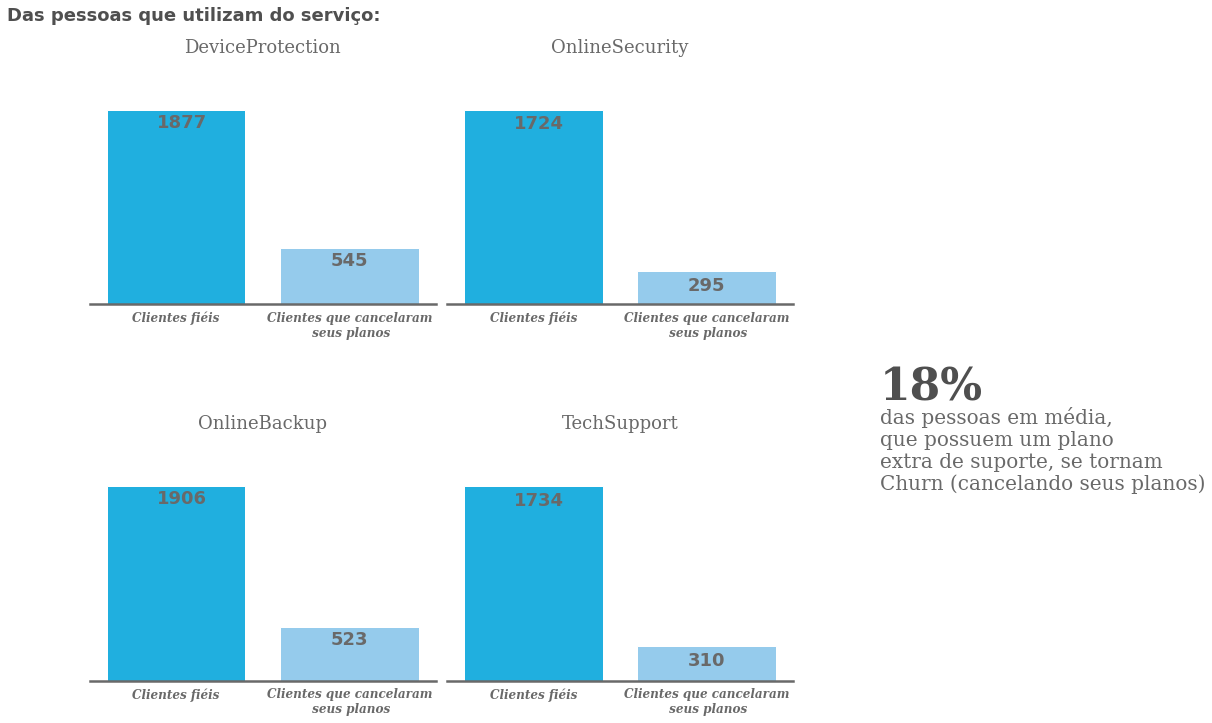

In [16]:
#definindo fontes

font4 = FontProperties()
font4.set_family('serif')
font4.set_name('serif')
font4.set_style('italic')
font4.set_weight('bold')
font4.set_size(12)

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(20)

font2 = FontProperties()
font2.set_family('serif')
font2.set_name('serif')
font2.set_size(18)

font3 = FontProperties()
font3.set_family('serif')
font3.set_name('serif')
font3.set_weight('bold')
font3.set_size(44)


#criando estilo
sns.set_style("white")

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (16,10))

#plotando gráfico
sns.countplot(x=df[df['DeviceProtection']=='Yes']['Churn'], ax=ax[0][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineSecurity']=='Yes']['Churn'], ax=ax[0][1], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['OnlineBackup']=='Yes']['Churn'], ax=ax[1][0], palette = ['#00BFFF', '#87CEFA'])
sns.countplot(x=df[df['TechSupport']=='Yes']['Churn'], ax=ax[1][1], palette = ['#00BFFF', '#87CEFA'])

#criando texto para o gráfico
plt.suptitle("Das pessoas que utilizam do serviço:\n\n", x=0.1, y=1, fontsize=18, weight='bold', color='#4F4F4F')


#título do gráfico
ax[0][0].set_title("\nDeviceProtection\n\n", fontdict = {'fontsize':14},fontproperties=font2,color = '#696969')
ax[0][1].set_title("OnlineSecurity\n\n", fontdict = {'fontsize':14}, fontproperties=font2,color = '#696969')
ax[1][0].set_title("OnlineBackup\n\n", fontdict = {'fontsize':14}, fontproperties=font2,color = '#696969')
ax[1][1].set_title("TechSupport\n\n", fontdict = {'fontsize':14}, fontproperties=font2,color = '#696969')

#removendo linha direita, esquerda, superior 
for axis in ['top', 'left', 'right']:
  for i in range(0,2,1):
    for j in range(0,2,1):
       ax[i][j].spines[axis].set_color(None)

#aumentando espessura da linha inferior 
for i in range(0,2,1):
  for j in range(0,2,1):
    ax[i][j].spines['bottom'].set_linewidth(2.5)
    
    #removendo ticks do eixo y
    ax[i][j].tick_params(axis = 'y', labelleft = False, width=False)

    ax[i][j].spines['bottom'].set_color('#696969')

    #removendo label
    ax[i][j].set_ylabel('')
    ax[i][j].set_xlabel('')

    ax[i][j].set_xticklabels(['Clientes fiéis','Clientes que cancelaram\n seus planos'], fontproperties=font4, color = '#696969')

#colocando legenda das quantidades dentro do gráfico
l=-1
leg_2 = ['DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'TechSupport']
for i in range(0,2,1):
  for j in range(0,2,1):
    l=l+1
    for k in range(0,2,1):
      ax[i][j].text(x = k-0.11, y = df[df[str(leg_2[l])]=='Yes']['Churn'].value_counts().values[k]-170,  
                    s = str(df[df[str(leg_2[l])]=='Yes']['Churn'].value_counts().values[k]), size=18, weight='bold', color='#696969') 

#criando texto para o gráfico
plt.text(x = 2, y=1700, s='das pessoas em média, \nque possuem um plano \nextra de suporte, se tornam\nChurn (cancelando seus planos)',
         color='#696969', fontproperties=font1)
plt.text(x = 2,y=2500, s='18%',color='#4F4F4F',  fontproperties=font3)


#otimizando tamanho
fig.tight_layout();

Agora a média percentual abaixa para 18%.



> `Através destes dois conjunto de gráfico, podemos afirmar que se um consumidor utiliza um dos serviços de proteção ele tem uma menor probabilidade se tornar Churn, sendo essa diferença de 22%.`



#### **2.2.6 O conjunto de dados tem outliers?!?**

Que tal fazermos um boxplot das variáveis contínuas. Assim podemos ver a existência de Outliers.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


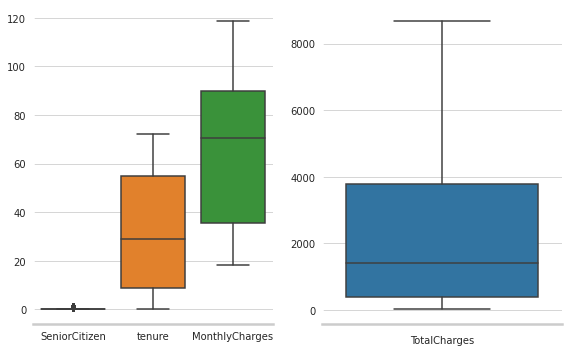

In [15]:
#estilo
sns.set_style('whitegrid')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(ncols = 2, figsize=(8,5))

#plotando gráfico
sns.boxplot(data=df.drop('TotalCharges', axis=1), ax = ax[0])
sns.boxplot(y = df['TotalCharges'], data=df, ax = ax[1])

#removendo linha direita, esquerda, superior
for i in range(0,2):
  for j in ['right', 'top', 'left']:
    ax[i].spines[j].set_color(None)

#aumentando espessura da linha inferior 
for i in range(0,2):
  for j in ['left', 'bottom']:
    ax[i].spines[j].set_linewidth(2.5)

#mudando nome do eixo x e y
ax[1].set_ylabel('')
ax[1].set_xlabel('TotalCharges')

#otimizando tamanho
fig.tight_layout();

Percebe-se que não há nenhum outlier no conjunto de dados. Caso houvesse seria prejudicial para o modelo de machine learning.

#### **2.2.7 Algumas outras caracteriśticas dos clientes Churn**

Vamos fazer duas verificações:

1. Será o tipo de internet contratada tem alguma relação com o cliente ser Churn ou não?
2. Será que a forma de pagamento tem alguma influência em cliente cancelar sua assinatura?

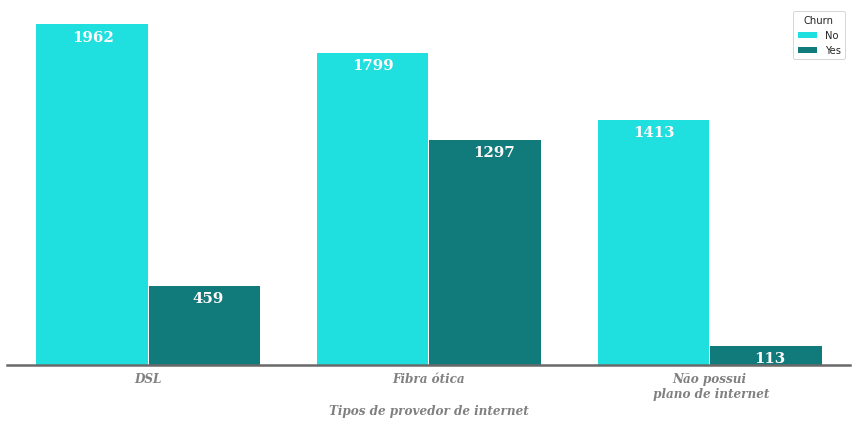

In [17]:
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_size(15)
font.set_weight('bold')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(12)
font1.set_weight('bold')
font1.set_style('italic')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(12,6))

#plotando gráfico
sns.countplot(x=df['InternetService'], hue=df['Churn'], ax=ax, palette=['#00FFFF', '#008B8B'])

#removendo linha direita, esquerda, superior
for axis in ['left', 'right', 'top']:
  ax.spines[axis].set_color(None)

#removendo ticks do eixo y
ax.tick_params(axis = 'y', left = None, labelleft = None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#mudando nome do eixo x e y
ax.set_ylabel('')
ax.set_xlabel('Tipos de provedor de internet', fontproperties = font1, color = '#808080')

#mudando ticks x 
ax.set_xticklabels(['DSL', 'Fibra ótica', 'Não possui\n plano de internet'], fontproperties = font1, color = '#808080')

#colocando legenda das quantidades dentro do gráfico
j = -0.25
for i in range(0, len( df.groupby('InternetService')['Churn'].value_counts().values ), 1):
  if (i%2 != 0):
    ax.text(x = j - 0.09, y = df.groupby('InternetService')['Churn'].value_counts().values[i] -100,
           s = str( df.groupby('InternetService')['Churn'].value_counts().values[i] ), 
           fontproperties = font, color='#FFFAFA')
    j = j + 0.5

  else:
    ax.text(x = j - 0.02, y = df.groupby('InternetService')['Churn'].value_counts().values[i] - 100,
            s = str( df.groupby('InternetService')['Churn'].value_counts().values[i] ),
            fontproperties = font, color='#FFFAFA')
    j = j + 0.5

#otimizando tamanho
fig.tight_layout()

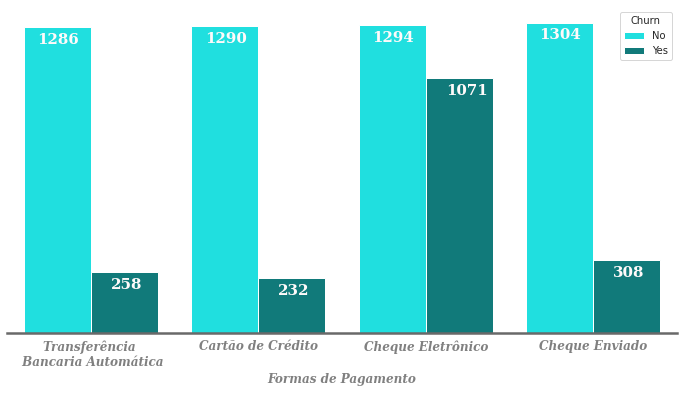

In [18]:
font = FontProperties()
font.set_family('serif')
font.set_name('serif')
font.set_size(15)
font.set_weight('bold')

font1 = FontProperties()
font1.set_family('serif')
font1.set_name('serif')
font1.set_size(12)
font1.set_weight('bold')
font1.set_style('italic')

#criando figure, axes e definindo tamanho do gráfico 
fig, ax = plt.subplots(figsize=(12,6))

#plotando gráfico
sns.countplot(x = df['PaymentMethod'].sort_values(), hue = df['Churn'],  palette = ['#00FFFF', '#008B8B'])

#removendo linha direita, esquerda, superior
for axis in ['left', 'right', 'top']:
  ax.spines[axis].set_color(None)

#mudando a cor da linha do eixo inferior
ax.spines['bottom'].set_color('#696969')

#aumentando espessura da linha inferior 
ax.spines['bottom'].set_linewidth(2.5)

#mudando nome do eixo x e y
ax.set_ylabel('')
ax.set_xlabel('Formas de Pagamento', fontproperties = font1, color = '#808080')

#mudando ticks x 
ax.set_xticklabels(['Transferência \n Bancaria Automática', 'Cartão de Crédito', 'Cheque Eletrônico' ,'Cheque Enviado'], 
                   fontproperties = font1, color = '#808080')

#colocando legenda das quantidades dentro do gráfico
j = -0.25
for i in range(0, len( df.groupby('PaymentMethod')['Churn'].value_counts().values ), 1):
  if (i%2 != 0):
    ax.text(x = j-0.13, y = df.groupby('PaymentMethod')['Churn'].value_counts().values[i] -70,
            s = str( df.groupby('PaymentMethod')['Churn'].value_counts().values[i] ), 
            fontproperties = font, color = '#FFFAFA')
    j = j + 0.5

  else:
    ax.text(x = j-0.07, y = df.groupby('PaymentMethod')['Churn'].value_counts().values[i] - 70,
            s = str( df.groupby('PaymentMethod')['Churn'].value_counts().values[i] ),
            fontproperties = font, color = '#FFFAFA')
    j = j + 0.5


ax.tick_params(axis = 'y', left = None, labelleft = None)

Através deste dois gráficos, pode-se responder as perguntas acima.

1. Nota-se que clientes que assinam internet do tipo fibra ótica, tem um maior número de cancelamentos em comparação com os clientes que não possuem internet ou utilizam um plano de internet DSL.

Podemos levantar algumas hipóteses do motivo disso acontecer:
* serviço de internet por fibra ótica não deve ter um bom desempenho
* custo benefício da internet fibra ótica pode ser ruim fazendo clientes se decepcionarem com a empresa de telecomunicação

2. Já no segundo gráfico é possível afirmar que os clientes que utilizam da forma de pagamento por Cheque eletrônico acabam cancelando seus planos mais do que outras formas.

### **Estamos chegando quase ao fim desse primeiro artigo!!!**

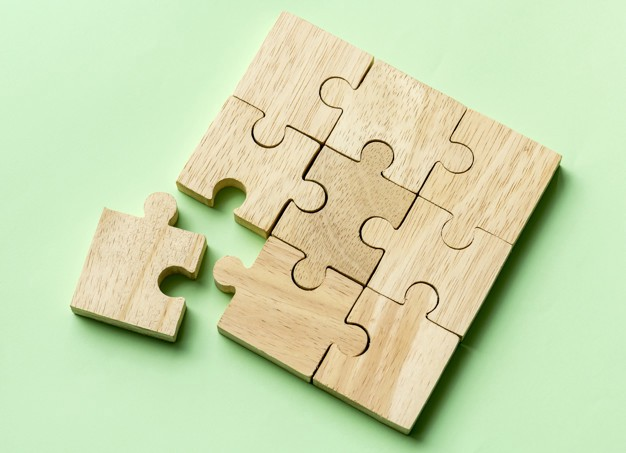

## **3. Conclusão** 

Depois dessa análise rápida podemos concluir alguma hipóteses.

**Em relação ao conjunto de dados pode-se afirmar que:**
* A variável dependente Churn está desbalanceada;
* Não há dados ausentes e nem outliers;
* Existe variáveis categóricas o tipo string que não são aceitas para o modelo de machine learning.

**Já em relação a situação da companhia podemos perceber alguns pontos:**
* A empresa teve um alto cancelamento de assinaturas nos 6 anos de avaliação;
* E o pior desse alto cancelamento foi que a valor perdido em assinaturas foi muito alto, chegando a 43% do lucro atual.
* A maioria dos clientes Churn desistem da assinatura após o primeiro mês, tendo um pequeno espaço de tempo para identificar e conquistar o cliente;
* A empresa também tem clientes fiéis que já estão a mais de 6 anos com suas assinaturas.

> `Claro que para ajudar em todo esse problema, um bom modelo de machine learning para prever quem são os clientes Churn pode trazer muitos ganhos. Assim a companhia pode reconhece-lo no menor tempo possível e buscar soluções para mantê-los como um cliente fiel.`






Por isso a próxima parte desse artigo será totalmente voltada para a criação de um modelo de machine learning.

OBS: A parte de Machine Learning está sendo terminada ainda e será disponibilizada o quanto antes o projeto no GitHub e tópico de Machine Learning.

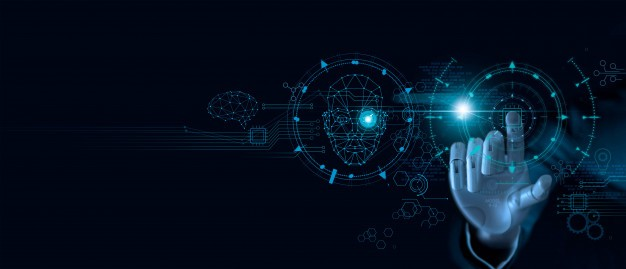